In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

C:\Users\28266\AppData\Local\Temp\ipykernel_27488\792173311.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(val*100) for val in plt.gca().get_yticks()])


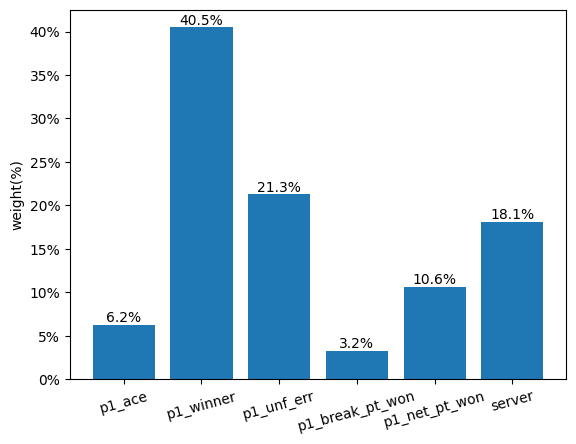

In [25]:
categories = ['p1_ace', 'p1_winner', 'p1_unf_err', 'p1_break_pt_won', 'p1_net_pt_won', 'server']
values = [0.0623, 0.405, 0.2126, 0.0325, 0.1063, 0.1814]

# 创建条形图
plt.bar(categories, values)

plt.gca().set_yticklabels(['{:.0f}%'.format(val*100) for val in plt.gca().get_yticks()])

for i, v in enumerate(values):
    plt.text(i, v, '{:.1%}'.format(v), ha='center', va='bottom')

plt.xticks(rotation=15) 
    
# 添加标签和标题
plt.ylabel('weight(%)')
# plt.title('weights')

svg_path = 'picture/weights.svg'
plt.savefig(svg_path, format='svg', bbox_inches='tight')

# 显示图形
plt.show()

In [113]:
wimbledon1 = pd.read_csv("./p1_score1.csv")
wimbledon1.head()

,Unnamed: 0,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,server,match_id,p1_score,set_no,game_no,p2_score,gap
0,0,0,0,1,0,0,1,2023-wimbledon-1301,0.000,1,1,0.0,0.000
1,1,0,0,0,0,0,1,2023-wimbledon-1301,-0.213,1,1,0.0,-0.213
2,2,0,0,1,0,0,1,2023-wimbledon-1301,0.000,1,1,0.0,0.000
3,3,0,1,0,0,0,1,2023-wimbledon-1301,-0.213,1,1,0.0,-0.213
4,4,1,1,0,0,0,1,2023-wimbledon-1301,0.405,1,1,0.0,0.405


In [4]:
pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ---- -------------------------------- 30.7/250.0 kB 660.6 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/250.0 kB 660.6 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/250.0 kB 660.6 kB/s eta 0:00:01
     ------ ------------------------------ 41.0/250.0 kB 217.9 kB/s eta 0:00:01
     ------------ ------------------------ 81.9/250.0 kB 353.1 kB/s eta 0:00:01
     ------------ ------------------------ 81.9/250.0 kB 353.1 kB/s eta 0:00:01
     ------------ ------------------------ 81.9/250.0 kB 353.1 kB/s eta 0:00:01
     ------------ ------------------------ 81.9/250.0 kB 353.1 kB/s eta 0:00:01
     ---------------- ------------------- 112.6/250.0 kB 273.1 kB/s eta 0:00:01
     ---------------- ------------------- 112.6/250.0 kB 273.

In [3]:
wimbledon1 = pd.read_excel('./data11.xlsx')
wimbledon1

,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,server,match_id,p1_score,set_no,game_no,p2_score,gap,p2_ace,p2_winner,p2_unf_err,p2_break_pt_won,p2_net_pt_won
0,0,0,1,0,0,1,2023-wimbledon-1301,0.000,1,1,0.000,0.000,0,0,0,0,0
1,0,0,0,0,0,1,2023-wimbledon-1301,-0.213,1,1,0.000,-0.213,0,0,0,0,0
2,0,0,1,0,0,1,2023-wimbledon-1301,0.000,1,1,0.000,0.000,0,0,0,0,0
3,0,1,0,0,0,1,2023-wimbledon-1301,-0.213,1,1,0.000,-0.213,0,0,0,0,0
4,1,1,0,0,0,1,2023-wimbledon-1301,0.405,1,1,0.000,0.405,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0,1,0,0,0,1,2023-wimbledon-1701,-0.213,5,10,0.000,-0.213,0,0,0,0,0
7280,0,1,0,0,1,1,2023-wimbledon-1701,0.405,5,10,0.000,0.405,0,0,0,0,0
7281,0,0,0,0,0,1,2023-wimbledon-1701,0.405,5,10,0.405,0.000,0,1,0,0,0
7282,0,0,0,0,0,1,2023-wimbledon-1701,0.000,5,10,0.000,0.000,0,0,0,0,0


In [4]:
data = wimbledon1.drop(['match_id', 'set_no', 'game_no'], axis=1)
data

,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,server,p1_score,p2_score,gap,p2_ace,p2_winner,p2_unf_err,p2_break_pt_won,p2_net_pt_won
0,0,0,1,0,0,1,0.000,0.000,0.000,0,0,0,0,0
1,0,0,0,0,0,1,-0.213,0.000,-0.213,0,0,0,0,0
2,0,0,1,0,0,1,0.000,0.000,0.000,0,0,0,0,0
3,0,1,0,0,0,1,-0.213,0.000,-0.213,0,0,0,0,0
4,1,1,0,0,0,1,0.405,0.000,0.405,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0,1,0,0,0,1,-0.213,0.000,-0.213,0,0,0,0,0
7280,0,1,0,0,1,1,0.405,0.000,0.405,0,0,0,0,0
7281,0,0,0,0,0,1,0.405,0.405,0.000,0,1,0,0,0
7282,0,0,0,0,0,1,0.000,0.000,0.000,0,0,0,0,0


In [5]:
# 使用apply函数更改列'A'的值
data['gap'] = data['gap'].apply(lambda x: 0 if x != 0 else 1)

data


,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,server,p1_score,p2_score,gap,p2_ace,p2_winner,p2_unf_err,p2_break_pt_won,p2_net_pt_won
0,0,0,1,0,0,1,0.000,0.000,1,0,0,0,0,0
1,0,0,0,0,0,1,-0.213,0.000,0,0,0,0,0,0
2,0,0,1,0,0,1,0.000,0.000,1,0,0,0,0,0
3,0,1,0,0,0,1,-0.213,0.000,0,0,0,0,0,0
4,1,1,0,0,0,1,0.405,0.000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0,1,0,0,0,1,-0.213,0.000,0,0,0,0,0,0
7280,0,1,0,0,1,1,0.405,0.000,0,0,0,0,0,0
7281,0,0,0,0,0,1,0.405,0.405,1,0,1,0,0,0
7282,0,0,0,0,0,1,0.000,0.000,1,0,0,0,0,0


In [4]:
# 获取前一个和后一个元素
data['prev'] = data['gap'].shift(1)
data['next'] = data['gap'].shift(-1)

# 应用条件逻辑
data['gap'] = np.where(
    data['gap'] != 0, 0,  # 如果A不等于0，则置为0
    np.where(
        (data['prev'] * data['next'] < 0), 1, 0  # 如果A等于0且前后符号相反，则置为1，否则保持0
    )
)

# 删除辅助列
data.drop(['prev', 'next'], axis=1, inplace=True)

data

,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,server,p1_score,p2_score,gap,p2_ace,p2_winner,p2_unf_err,p2_break_pt_won,p2_net_pt_won
0,0,0,1,0,0,1,0.000,0.000,0,0,0,0,0,0
1,0,0,0,0,0,1,-0.213,0.000,0,0,0,0,0,0
2,0,0,1,0,0,1,0.000,0.000,0,0,0,0,0,0
3,0,1,0,0,0,1,-0.213,0.000,0,0,0,0,0,0
4,1,1,0,0,0,1,0.405,0.000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0,1,0,0,0,1,-0.213,0.000,0,0,0,0,0,0
7280,0,1,0,0,1,1,0.405,0.000,0,0,0,0,0,0
7281,0,0,0,0,0,1,0.405,0.405,0,0,1,0,0,0
7282,0,0,0,0,0,1,0.000,0.000,0,0,0,0,0,0


In [6]:
X = data.drop(['gap', 'p1_score', 'p2_score'], axis=1)
y = data['gap']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),  # 输入层 + 第一个隐藏层
    Dense(10, activation='relu'),  # 另一个隐藏层
    Dense(10, activation='relu'),  # 另一个隐藏层
    Dense(1, activation='sigmoid')  # 输出层
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
X

,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,server,p2_ace,p2_winner,p2_unf_err,p2_break_pt_won,p2_net_pt_won
0,0,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7279,0,1,0,0,0,1,0,0,0,0,0
7280,0,1,0,0,1,1,0,0,0,0,0
7281,0,0,0,0,0,1,0,1,0,0,0
7282,0,0,0,0,0,1,0,0,0,0,0


In [8]:
y

0       1
1       0
2       1
3       0
4       0
       ..
7279    0
7280    0
7281    1
7282    1
7283    1
Name: gap, Length: 7284, dtype: int64

In [8]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

Epoch 1/10
183/183 [==============================] - 1s 2ms/step - loss: 0.6464 - accuracy: 0.6662 - val_loss: 0.5889 - val_accuracy: 0.6891
Epoch 2/10
183/183 [==============================] - 0s 1ms/step - loss: 0.5388 - accuracy: 0.7506 - val_loss: 0.5513 - val_accuracy: 0.7248
Epoch 3/10
183/183 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.7591 - val_loss: 0.5481 - val_accuracy: 0.7248
Epoch 4/10
183/183 [==============================] - 0s 1ms/step - loss: 0.5167 - accuracy: 0.7591 - val_loss: 0.5466 - val_accuracy: 0.7248
Epoch 5/10
183/183 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7591 - val_loss: 0.5465 - val_accuracy: 0.7248
Epoch 6/10
183/183 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.7591 - val_loss: 0.5463 - val_accuracy: 0.7248
Epoch 7/10
183/183 [==============================] - 0s 1ms/step - loss: 0.5158 - accuracy: 0.7591 - val_loss: 0.5444 - val_accuracy: 0.7248
Epoch 

46/46 [==============================] - 0s 813us/step
AUC: 0.7669


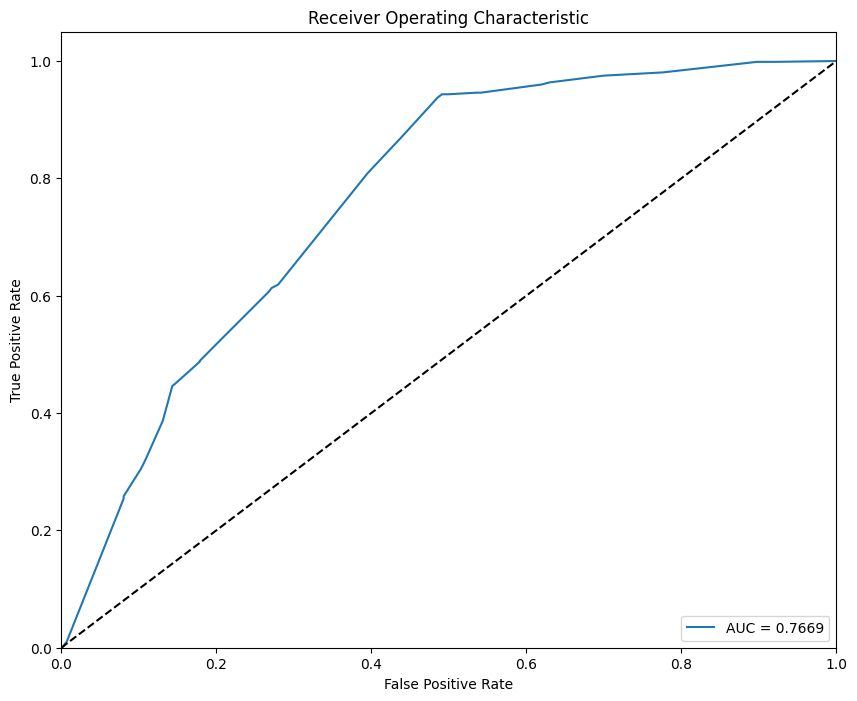

In [9]:
# 预测测试集
y_pred = model.predict(X_test).ravel()

# 计算AUC值
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc:.4f}")

# 计算ROC曲线的值
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# 绘制ROC曲线
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # 随机概率线

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [10]:
weights, biases = model.layers[0].get_weights()
print("Weights:", weights)

Weights: [[ 2.8310192e-01 -2.2733143e-01 -5.1983362e-01  6.0096838e-02
  -4.3395364e-01  3.6984682e-04  2.2626153e-01 -3.1506222e-01
  -3.5480264e-01 -2.9633287e-01]
 [-3.4717229e-01  1.9133173e-02 -4.3058246e-01  4.5069346e-01
   2.9617211e-01 -3.6384374e-01 -8.1962951e-02 -3.6915061e-01
  -3.8908568e-01 -5.3761822e-01]
 [-4.2874491e-01 -3.0817336e-01  1.6356400e-01 -1.4892319e-01
  -2.1627748e-01 -4.8538539e-01 -9.1060944e-02 -2.5737613e-01
  -2.6836511e-01  3.1615254e-01]
 [ 3.2883596e-01  1.5509208e-01  2.7780155e-02 -5.0750297e-01
   4.1996486e-02  2.4971165e-01  3.3082619e-01 -1.6794248e-01
   3.0364428e-02  3.8667732e-01]
 [ 2.0851831e-01 -4.1063851e-01  6.6513635e-02  3.0174708e-01
   3.1910425e-01 -1.4867550e-01 -1.2756526e-01 -2.4597731e-01
   1.1839590e-01  1.7924203e-02]
 [-3.0582914e-01  1.0187685e-01 -4.0437025e-01 -3.8999061e-03
  -3.8078585e-01  4.3085579e-02 -3.7920544e-01 -2.2324964e-01
  -5.3119308e-01 -6.2006694e-01]
 [-3.5948199e-01 -2.9051203e-01  7.1039617e-01  2

In [11]:
a = abs(weights[-1]) / sum(abs(weights[-1]))
a

array([0.12419446, 0.01465719, 0.01764593, 0.15540145, 0.16004221,
       0.03899828, 0.11745174, 0.09661786, 0.14391924, 0.13107167],
      dtype=float32)

In [57]:
X = data.drop(['gap', 'p1_score', 'p2_score'], axis=1)
y = data['gap']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 初始化模型
model = Sequential()

# 添加输入层和第一个隐藏层，使用ReLU激活函数
model.add(Dense(64, input_dim=11, activation='relu'))

# 添加第二个隐藏层
model.add(Dense(32, activation='relu'))

# 添加输出层，使用sigmoid激活函数进行二分类
model.add(Dense(1, activation='sigmoid'))

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 训练模型
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test)
print(f'测试集上的准确率: {accuracy:.2f}')


Epoch 1/100
583/583 [==============================] - 1s 1ms/step - loss: 0.5514 - accuracy: 0.7297
Epoch 2/100
583/583 [==============================] - 0s 766us/step - loss: 0.5222 - accuracy: 0.7525
Epoch 3/100
583/583 [==============================] - 1s 1ms/step - loss: 0.5214 - accuracy: 0.7530
Epoch 4/100
583/583 [==============================] - 1s 1ms/step - loss: 0.5208 - accuracy: 0.7515
Epoch 5/100
583/583 [==============================] - 0s 701us/step - loss: 0.5201 - accuracy: 0.7522
Epoch 6/100
583/583 [==============================] - 1s 1ms/step - loss: 0.5202 - accuracy: 0.7529
Epoch 7/100
583/583 [==============================] - 1s 975us/step - loss: 0.5201 - accuracy: 0.7536
Epoch 8/100
583/583 [==============================] - 1s 1ms/step - loss: 0.5195 - accuracy: 0.7536
Epoch 9/100
583/583 [==============================] - 1s 1ms/step - loss: 0.5196 - accuracy: 0.7539
Epoch 10/100
583/583 [==============================] - 1s 1ms/step - loss: 0.5200 - 

In [16]:
from keras.layers import Embedding, SimpleRNN, Dense
from keras.preprocessing import pad_sequences

vocab_size = 7824  # 词汇表大小
maxlen = 300  # 每个序列的最大长度
batch_size = 32

X = data.drop(['gap', 'p1_score', 'p2_score'], axis=1)
y = data['gap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = pad_sequences(X, maxlen=maxlen)
X_test = pad_sequences(y, maxlen=maxlen)

# 构建模型
model = Sequential()
model.add(Embedding(vocab_size, 32))  # 嵌入层
model.add(SimpleRNN(32))  # RNN层
model.add(Dense(1, activation='sigmoid'))  # 输出层

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


ImportError: cannot import name 'pad_sequences' from 'keras.preprocessing' (C:\Users\28266\.conda\envs\tf2\lib\site-packages\keras\preprocessing\__init__.py)

In [15]:
pip install --upgrade tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [115]:
# 这个函数的目的是从给定的数据集中选择变量并且对它们进行处理。
# 输入参数包括match_data（数据集），indicator（指标），index（指标索引），以及if_diff（布尔值，表示是否进行差值处理）。
def select_variables(match_data, indicator, index, if_diff):
    # 首先对数据进行分组，按照'match_id'、'set_no'进行分组，并将指定指标的数值进行累加并存储到列表中。
    grouped_data = match_data.groupby(['match_id', 'set_no', 'game_no'])[indicator].sum().reset_index(name=index)
    # 将每场比赛的得分列表存储在points_won_lists中
    points_won_lists = grouped_data.groupby(['match_id', 'set_no', 'game_no']).apply(lambda x: x[index].tolist()).tolist()
    #points_won_lists = grouped_data[index].tolist()
    # 如果if_diff为True，表示需要计算得分之间的差值
    if if_diff:
        # 通过列表解析计算每场比赛中两个得分列表中对应位置的差值，并将差值列表替换原始的得分列表
        points_won_lists = [[p1 - p2 for p1, p2 in match] for match in points_won_lists]
    # 返回处理后的得分列表
    return points_won_lists

In [116]:
data = pd.DataFrame()

In [124]:
points_won_lists = select_variables(wimbledon1, 'p1_ace', 'p1_ace', False)
points_won_lists = [element for sublist in points_won_lists for element in sublist]
data['p1_ace'] = points_won_lists

In [125]:
points_won_lists = select_variables(wimbledon1, 'p1_winner', 'p1_winner', False)
points_won_lists = [element for sublist in points_won_lists for element in sublist]
data['p1_winner'] = points_won_lists

In [126]:
points_won_lists = select_variables(wimbledon1, 'p1_unf_err', 'p1_unf_err', False)
points_won_lists = [element for sublist in points_won_lists for element in sublist]
data['p1_unf_err'] = points_won_lists

In [127]:
points_won_lists = select_variables(wimbledon1, 'p1_break_pt_won', 'p1_break_pt_won', False)
points_won_lists = [element for sublist in points_won_lists for element in sublist]
data['p1_break_pt_won'] = points_won_lists

In [128]:
points_won_lists = select_variables(wimbledon1, 'p1_net_pt_won', 'p1_net_pt_won', False)
points_won_lists = [element for sublist in points_won_lists for element in sublist]
data['p1_net_pt_won'] = points_won_lists

In [122]:
points_won_lists = select_variables(wimbledon1, 'server', 'server', False)
points_won_lists = [element for sublist in points_won_lists for element in sublist]
data['server'] = points_won_lists

In [123]:
points_won_lists = select_variables(wimbledon1,'gap', 'gap', False)
points_won_lists = [element for sublist in points_won_lists for element in sublist]
data['gap'] = points_won_lists

In [129]:
data

,p2_ace,p2_winner,p2_unf_err,p2_break_pt_won,p2_net_pt_won,server,gap,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won
0,0,1,0,0,1,10,7,2,3,2,0,1
1,1,3,1,0,1,0,4,0,0,0,0,0
2,0,0,1,0,0,5,2,1,1,0,0,0
3,1,2,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,8,2,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1183,0,0,1,0,1,6,3,1,1,0,0,1
1184,0,1,0,0,1,0,4,0,2,0,0,0
1185,0,0,0,0,0,5,1,1,2,1,0,0
1186,0,1,0,0,1,0,2,0,0,0,0,0


## 随机森林

In [8]:
data.to_excel('data111.xlsx', index=False)

In [17]:
# 分割自变量和目标变量
X = data.drop(['gap', 'p1_score', 'p2_score'], axis=1)
y = data['gap']

In [18]:
X

,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,server,p2_ace,p2_winner,p2_unf_err,p2_break_pt_won,p2_net_pt_won
0,0,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7279,0,1,0,0,0,1,0,0,0,0,0
7280,0,1,0,0,1,1,0,0,0,0,0
7281,0,0,0,0,0,1,0,1,0,0,0
7282,0,0,0,0,0,1,0,0,0,0,0


In [19]:
y

0       1
1       0
2       1
3       0
4       0
       ..
7279    0
7280    0
7281    1
7282    1
7283    1
Name: gap, Length: 7284, dtype: int64

In [20]:
# 获取数组中每个不同值及其出现的次数
unique_values, counts = np.unique(y, return_counts=True)

# 打印每个值及其出现次数
for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')


Value: 0, Count: 3537
Value: 1, Count: 3747


In [21]:
from sklearn.model_selection import train_test_split
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
# 训练模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# 预测结果
y_pred = rf.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# 计算MSE和R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# # 预测结果
# y_pred = rf.predict(X_test)
# from sklearn.metrics import mean_squared_error, r2_score

# 计算MSE和R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 输出模型评估结果和目标方程
print('MSE:', mse)
print('R-squared:', r2)

MSE: 0.17811149920017194
R-squared: 0.28704317679192315


In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7412491420727523


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [10]:
X

,p1_ace,p1_winner,p1_unf_err,p1_break_pt_won,p1_net_pt_won,server,p2_ace,p2_winner,p2_unf_err,p2_break_pt_won,p2_net_pt_won
0,0,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7279,0,1,0,0,0,1,0,0,0,0,0
7280,0,1,0,0,1,1,0,0,0,0,0
7281,0,0,0,0,0,1,0,1,0,0,0
7282,0,0,0,0,0,1,0,0,0,0,0


In [12]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("最佳参数:", grid_search.best_params_)
print("最佳分数:", grid_search.best_score_)
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("测试集上的准确率:", test_accuracy)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
最佳参数: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
最佳分数: 0.7492703862660944
测试集上的准确率: 0.7549759780370625


In [66]:
# 输出目标方程
print("目标方程：")
for i, feature in enumerate(X.columns):
    print("{} * {} +".format(rf.feature_importances_[i], feature), end=' ')

目标方程：
0.02218725188601197 * p1_ace + 0.6043294742031801 * p1_winner + 0.08768206318072283 * p1_unf_err + 0.11025448691045465 * p1_break_pt_won + 0.05511623958839921 * p1_net_pt_won + 0.12043048423123127 * server + 

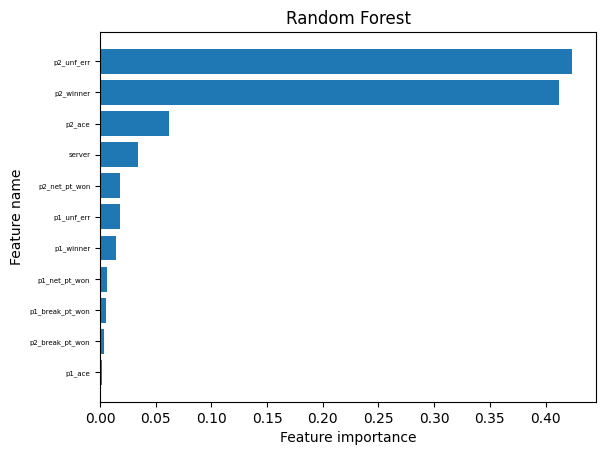

In [55]:
import matplotlib.pyplot as plt
# 绘制特征重要性条形图
feature_importance = clf.feature_importances_
feature_names = X.columns.tolist()
sorted_idx = feature_importance.argsort()
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx])
plt.yticks(range(len(feature_importance)), [feature_names[i] for i in sorted_idx],fontsize=5)
plt.xlabel('Feature importance')
plt.ylabel('Feature name')
plt.title('Random Forest')
plt.savefig('Random Forest',dpi=300)

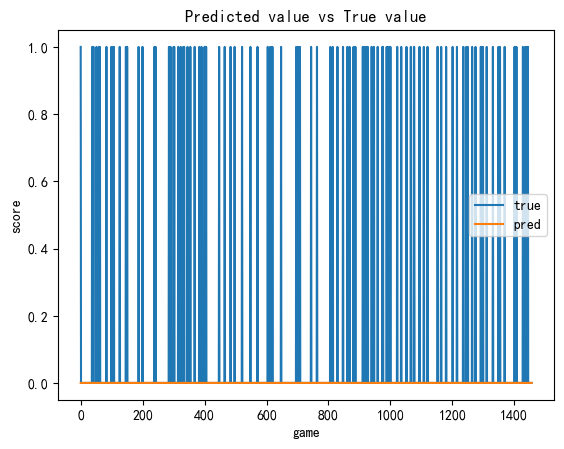

In [166]:
import matplotlib.pyplot as plt

# 创建一个新的图形
fig, ax = plt.subplots()

# 绘制预测值和真实值的折线图
ax.plot(range(len(y_test)), y_test, label='true')
ax.plot(range(len(y_test)), y_pred, label='pred')
ax.set_xlabel('game')
ax.set_ylabel('score')
ax.set_title('Predicted value vs True value')
ax.legend()
plt.savefig('Random Forest all',dpi=300)
plt.show()

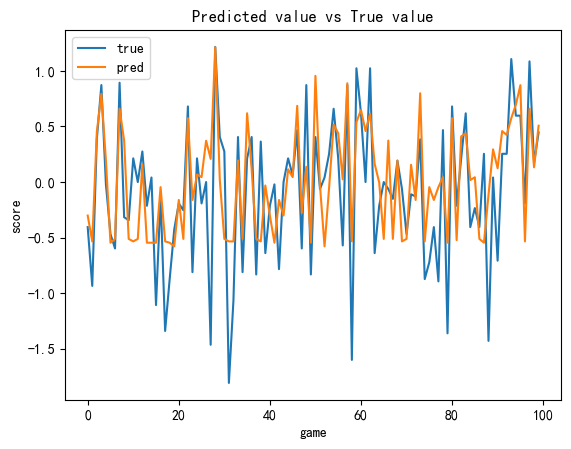

In [69]:
import matplotlib.pyplot as plt

# 创建一个新的图形
fig, ax = plt.subplots()

# 绘制预测值和真实值的折线图
# 仅绘制前100个预测值和真实值的折线图
ax.plot(range(100), y_test[:100], label='true')
ax.plot(range(100), y_pred[:100], label='pred')
ax.set_xlabel('game')
ax.set_ylabel('score')
ax.set_title('Predicted value vs True value')
ax.legend()
plt.savefig('Random Forest 100',dpi=300)
plt.show()

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

ValueError: continuous is not supported

## SVM

In [54]:
# 下面是SVM

from sklearn.svm import SVR
# 训练模型
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)
# 预测结果
y_pred = svm.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# 计算MSE和R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 输出模型评估结果和目标方程
print('MSE:', mse)
print('R-squared:', r2)

MSE: 0.1757746103349144
R-squared: 0.60690180147813


In [64]:
# 获取支持向量的索引
support_vectors_index = svm.support_

# 获取支持向量对应的特征权重
support_vectors_coeff = svm.dual_coef_[0]

# 获取对应的特征
support_vectors_features = X_train.iloc[support_vectors_index]

# 计算特征重要性
feature_importance = (support_vectors_features * support_vectors_coeff[:, np.newaxis]).sum(axis=0)

# 输出特征重要性
print('特征重要性:')
for feature, importance in zip(X_train.columns, feature_importance):
    print("{}: {:.4f}".format(feature, importance))

特征重要性:
p1_ace: 5.2894
p1_winner: 18.3709
p1_unf_err: -1.9405
p1_break_pt_won: 7.9818
p1_net_pt_won: -0.8934
server: -1.8475


C:\Users\25609\AppData\Local\Temp\ipykernel_29708\3279494524.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.barh(range(len(feature_importance)), feature_importance[sorted_idx])


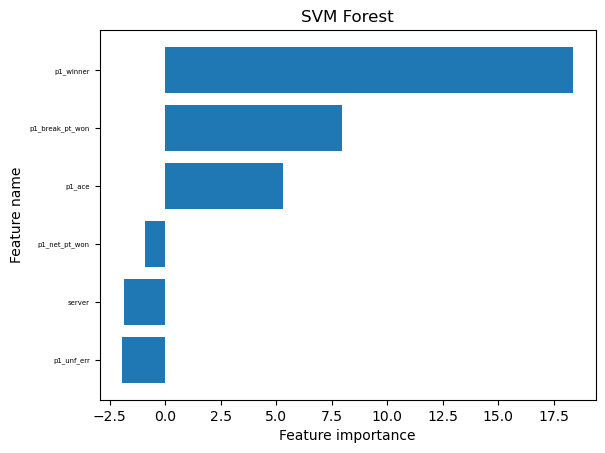

In [67]:
import matplotlib.pyplot as plt
# 绘制特征重要性条形图
feature_names = X.columns.tolist()
sorted_idx = feature_importance.argsort()
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx])
plt.yticks(range(len(feature_importance)), [feature_names[i] for i in sorted_idx],fontsize=5)
plt.xlabel('Feature importance')
plt.ylabel('Feature name')
plt.title('SVM Forest')
plt.savefig('SVM Forest',dpi=300)

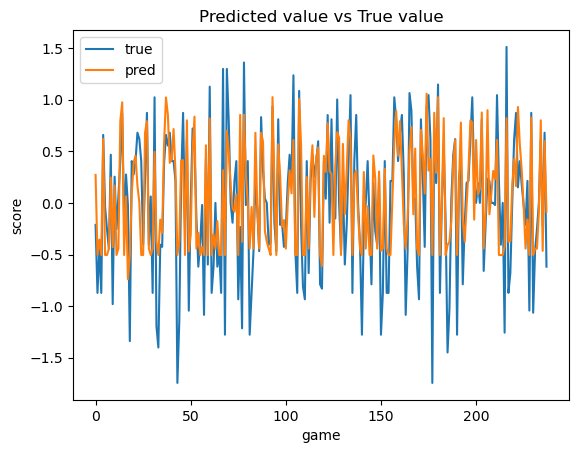

In [69]:
import matplotlib.pyplot as plt

# 创建一个新的图形
fig, ax = plt.subplots()

# 绘制预测值和真实值的折线图
ax.plot(range(len(y_test)), y_test, label='true')
ax.plot(range(len(y_test)), y_pred, label='pred')
ax.set_xlabel('game')
ax.set_ylabel('score')
ax.set_title('Predicted value vs True value')
ax.legend()
plt.savefig('SVM all',dpi=300)
plt.show()

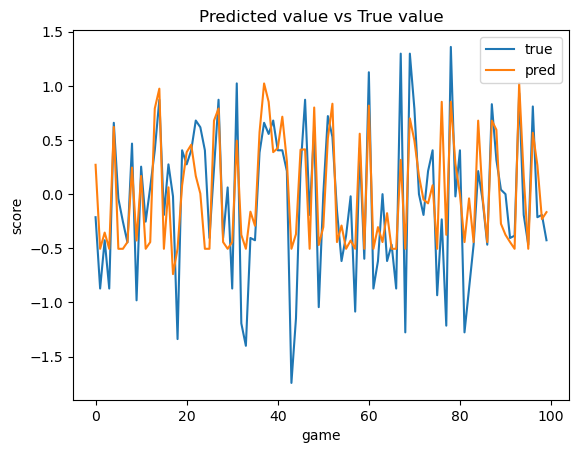

In [70]:
import matplotlib.pyplot as plt

# 创建一个新的图形
fig, ax = plt.subplots()

# 绘制预测值和真实值的折线图
# 仅绘制前100个预测值和真实值的折线图
ax.plot(range(100), y_test[:100], label='true')
ax.plot(range(100), y_pred[:100], label='pred')
ax.set_xlabel('game')
ax.set_ylabel('score')
ax.set_title('Predicted value vs True value')
ax.legend()
plt.savefig('SVM 100',dpi=300)
plt.show()

In [32]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual))

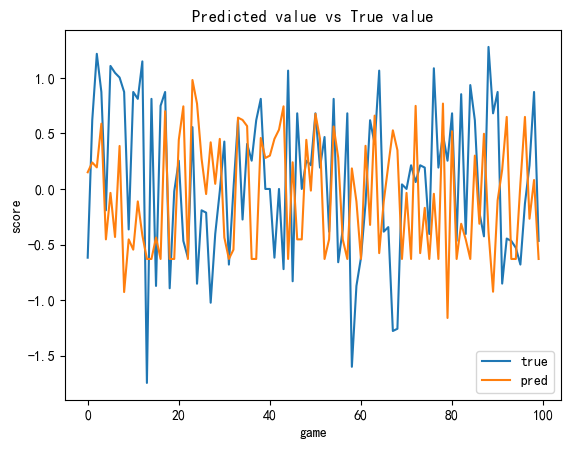

In [61]:
# 创建一个新的图形
fig, ax = plt.subplots()

# 绘制预测值和真实值的折线图
# 仅绘制前100个预测值和真实值的折线图
ax.plot(range(100), y_test[:100], label='true')
ax.plot(range(100), y_pred[:100], label='pred')
ax.set_xlabel('game')
ax.set_ylabel('score')
ax.set_title('Predicted value vs True value')
ax.legend()
plt.savefig('xgboost 100',dpi=300)
plt.show()

In [50]:
tr_y

764     1.106000e+00
1033    4.050000e-01
787    -1.277000e+00
500    -1.147000e+00
1063   -1.277000e+00
            ...     
73      2.100000e-02
1142   -2.775558e-17
998     1.085000e+00
206     0.000000e+00
867     2.130000e-01
Name: gap, Length: 831, dtype: float64


xgboost回归:
训练集平均绝对百分比误差:0.000
平均绝对误差: 0.29705291128939215
r2_score 0.6412405920492912


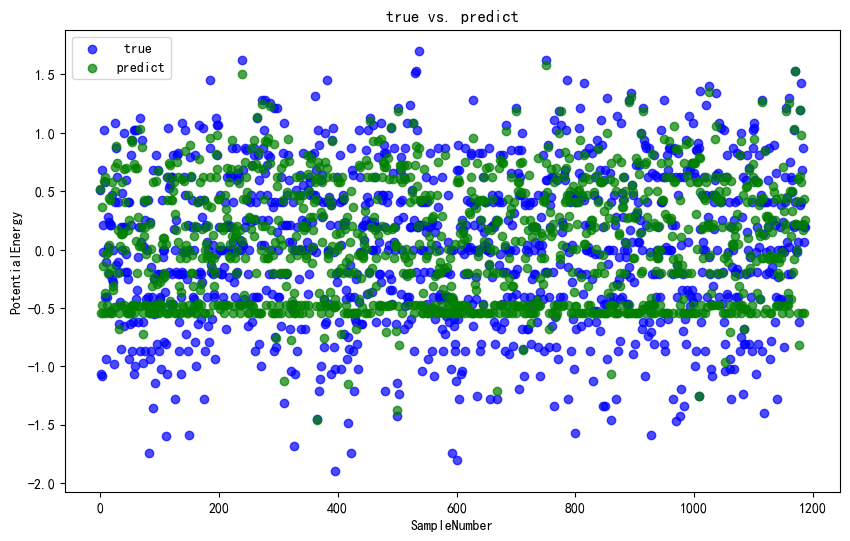

In [52]:
tr_x,te_x,tr_y,te_y=train_test_split(X ,y,test_size=0.3,random_state=5)

print("\nxgboost回归:")
# 构建xgboost回归模型
xgb_model = xgb.XGBRegressor(n_estimators=31,max_depth=6)
xgb_model.fit(X,y)
y_pred = xgb_model.predict(X)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(X),y_pred)))
print("平均绝对误差:",mean_absolute_error(y, y_pred))
print("r2_score",r2_score(y,y_pred))

plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = xgb_model.predict(tr_x)
plt.scatter(list(range(X.shape[0])), y, color='blue', label=' true', alpha=0.7)
plt.scatter(list(range(X.shape[0])), y_pred, color='green', label='predict', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()


xgboost回归:
训练集平均绝对百分比误差:2.544
平均绝对误差: 0.35601452759611596
r2_score 0.4561784006403916


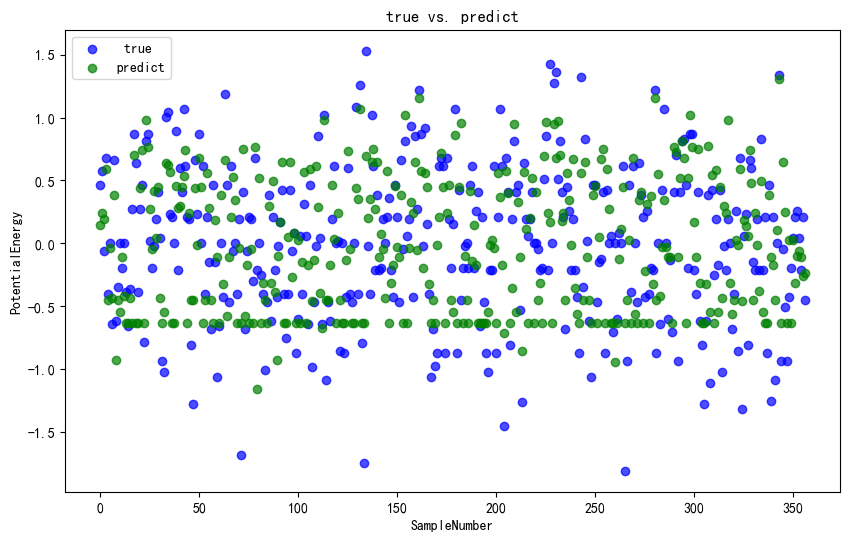

In [55]:
tr_x,te_x,tr_y,te_y=train_test_split(X ,y,test_size=0.3,random_state=5)

print("\nxgboost回归:")
# 构建xgboost回归模型
xgb_model = xgb.XGBRegressor(n_estimators=31,max_depth=6)
xgb_model.fit(tr_x,tr_y)
y_pred = xgb_model.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(tr_x),tr_y)))
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("r2_score",r2_score(te_y,y_pred))

plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = xgb_model.predict(tr_x)
plt.scatter(list(range(te_x.shape[0])), te_y, color='blue', label=' true', alpha=0.7)
plt.scatter(list(range(te_x.shape[0])), y_pred, color='green', label='predict', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()

In [56]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 初始化SHAP模型
explainer = shap.Explainer(xgb_model)


# 计算SHAP值
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [57]:
shap_df = pd.DataFrame(shap_values.values, columns=X.columns)

In [58]:
# 输出每个特征的SHAP值（绝对值）
features=[]
abs_mean_shap_values=[]
for i, feature in enumerate(X.columns):
    abs_mean_shap_value = np.abs(shap_df.values[:, i]).mean()
    features.append(feature)
    abs_mean_shap_values.append(abs_mean_shap_value)

In [59]:
tt=pd.DataFrame(features,columns=['features'])
tt['shap_values']=abs_mean_shap_values
tt

,features,shap_values
0,p1_ace,0.011854
1,p1_winner,0.349960
2,p1_unf_err,0.063919
3,p1_break_pt_won,0.081898
4,p1_net_pt_won,0.021996
5,server,0.087989


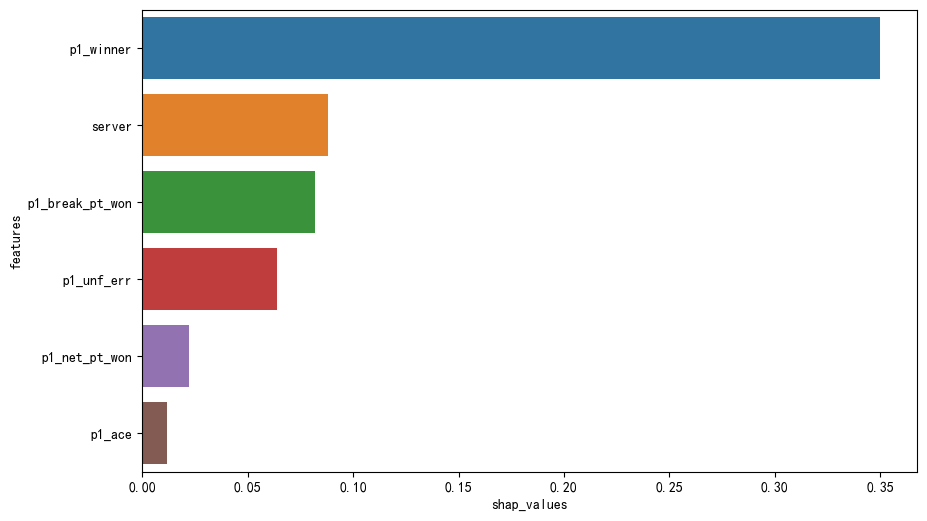

In [60]:
a_sorted = tt.sort_values(by='shap_values', ascending=False)

# 设置图表大小，例如设置为宽10英寸，高6英寸
plt.figure(figsize=(10, 6))
# 使用Seaborn绘制柱状图
sns.barplot(x='shap_values', y='features', data=a_sorted.reset_index(), orient='h')
# plt.savefig('classify')
# 显示图形
plt.show()
#特征重要度

In [76]:
data = pd.read_excel('./data11.xlsx')
data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,1,0.8,0.9,0.10
0,0,0,0,0,0,0,0,0,0,0,0,-0.213
1,0,0,0,0,0,0,0,0,1,0,0,0.000
2,0,0,0,0,0,0,0,1,0,0,0,-0.213
3,0,0,0,0,0,0,1,1,0,0,0,0.405
4,0,0,0,0,0,0,0,0,0,0,0,0.467
...,...,...,...,...,...,...,...,...,...,...,...,...
7278,0,0,0,0,0,0,0,1,0,0,0,-0.213
7279,0,0,0,0,0,0,0,1,0,0,1,0.405
7280,0,1,0,0,0,0,0,0,0,0,0,0.000
7281,0,0,0,0,0,0,0,0,0,0,0,0.000


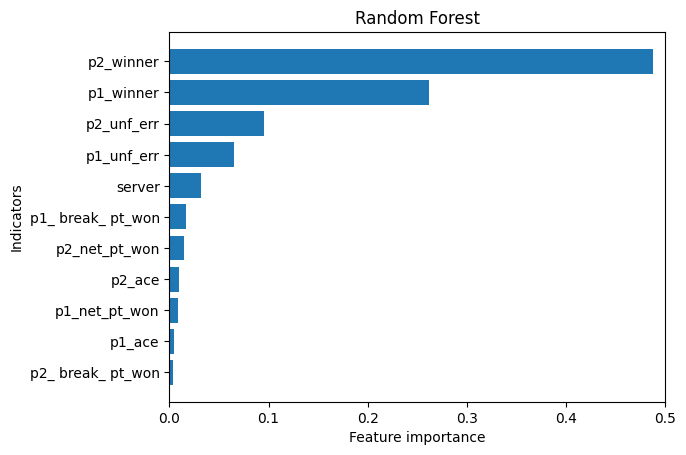

In [44]:
import matplotlib.pyplot as plt

# 示例数据
categories = ['p1_ace', 'p1_winner', 'p1_unf_err', 'p1_ break_ pt_won', 'p1_net_pt_won', 
             'p2_ace', 'p2_winner', 'p2_unf_err', 'p2_ break_ pt_won', 'p2_net_pt_won', 
             'server']
values_percentage = [0.0051, 0.2617, 0.0650, 0.0170, 0.0091, 0.0101, 0.4871, 0.0955, 0.0035, 0.0145, 0.0315]  # 数据已经是百分比形式
sorted_indices = sorted(range(len(values)), key=lambda i: values[i], reverse=True)
combined_lists = list(zip(values_percentage, categories))
sorted_combined_lists = sorted(combined_lists, key=lambda x: x[0])

sorted_values = [values[i] for i in sorted_indices]

values_percentage, categories = zip(*sorted_combined_lists)
# 创建横向柱形图
plt.barh(categories, values_percentage)

# 添加标签和标题
plt.xlabel('Feature importance')
plt.ylabel('Indicators')
plt.title('Random Forest')
# plt.xticks(range(len(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5'])), ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5'])
# from matplotlib.ticker import FuncFormatter

# def percentage_formatter(x, pos):
#     return '{:.0%}'.format(x)

# # 设置横坐标刻度的格式
# plt.gca().xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# # 在每个柱形上标出横坐标值
# for i, v in enumerate(values_percentage):
#     plt.text(v, i, '{:.1%}'.format(v), ha='left', va='center')

# # 设置横坐标标签为百分比
# plt.gca().set_xticklabels(['{:.0f}%'.format(val*100) for val in plt.gca().get_xticks()])

# # 在每个柱形上标出横坐标值
# for i, v in enumerate(values_percentage):
#     plt.text(v, i, '{:.1%}'.format(v), ha='left', va='center')

# for i, v in enumerate(sorted_values):
#     plt.text(v, i, str(v), ha='left', va='center')
plt.xlim(0.0, 0.5)
# 保存图形为SVG格式，并确保没有多余的空白
plt.savefig('picture/horizontal_bar_chart.svg', format='svg', bbox_inches='tight')

# 显示图形
plt.show()